<a href="https://colab.research.google.com/github/Arvinzaheri/english_kaggle_real_fake_news/blob/main/news_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("/content/news.csv")

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


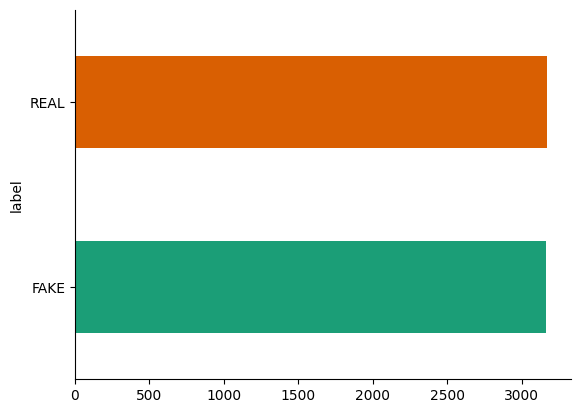

In [9]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(data["label"])

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text  # Registers the ops.


In [ ]:
pip install tf-models-official

In [ ]:
#text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
#preprocessor = hub.KerasLayer(
 #   "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
#encoder_inputs = preprocessor(text_input)
#encoder = hub.KerasLayer(
 #   "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/3",
  #  trainable=True)
#outputs = encoder(encoder_inputs)
#pooled_output = outputs["pooled_output"]

In [17]:
import numpy as np
import tensorflow as tf

import keras_nlp

In [7]:
train = data["title"] + " " + data["text"]


In [18]:
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=2,
    dropout=0.2

)
classifier.fit(
    x=train,
    y=y,
    batch_size=64,
    epochs=10,
    validation_split=0.1
)

100%|██████████| 507/507 [00:00<00:00, 331kB/s]
100%|██████████| 16.8M/16.8M [00:00<00:00, 36.6MB/s]
100%|██████████| 547/547 [00:00<00:00, 588kB/s]
100%|██████████| 226k/226k [00:00<00:00, 2.24MB/s]


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 459ms/step - loss: 0.6326 - sparse_categorical_accuracy: 0.6851 - val_loss: 0.4250 - val_sparse_categorical_accuracy: 0.8517
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 67s 746ms/step - loss: 0.3841 - sparse_categorical_accuracy: 0.8632 - val_loss: 0.2345 - val_sparse_categorical_accuracy: 0.9132
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.2262 - sparse_categorical_accuracy: 0.9204 - val_loss: 0.1840 - val_sparse_categorical_accuracy: 0.9322
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - loss: 0.1463 - sparse_categorical_accuracy: 0.9515 - val_loss: 0.2175 - val_sparse_categorical_accuracy: 0.9164
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.1798 - val_sparse_categorical_accuracy: 0.9353
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.1962 - val_sparse_categorical_accuracy: 0.9290
Ep

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42, stratify=y)

train = tf.data.Dataset.from_tensor_slices((X_train.values, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test.values, y_test))

In [ ]:
import tensorflow as tf
import keras_nlp
import keras
keras.backend.clear_session()

preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_base_en",
)

# Apply the preprocessor to every sample of train and test data using `map()`.
# [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data/AUTOTUNE) and `prefetch()` are options to tune performance, see
# https://www.tensorflow.org/guide/data_performance for details.

# Note: only call `cache()` if you training data fits in CPU memory!
train_cached = (
    train.map(preprocessor, tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE))

train_cached = train_cached.shuffle(len(X_train)).batch(64)

test_cached = (
    test.map(preprocessor, tf.data.AUTOTUNE).cache().prefetch(tf.data.AUTOTUNE))

test_cached = test_cached.shuffle(len(X_test)).batch(64)


classifier_1 = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=4,
    preprocessor=None,
)

classifier_1.fit(
    train_cached,
    epochs=10,
    validation_data=test_cached
)


Epoch 1/10
